<a href="https://colab.research.google.com/github/maanyakharbanda/Infosys-Internship/blob/main/Time_Series_ARIMA_batter_baller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings # manages warning messages during the code execution
warnings.simplefilter('ignore')

Load data

In [14]:
match_data=pd.read_csv('matches.csv')
match_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [15]:
match_data.drop('method',axis=1,inplace=True)
match_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [16]:
match_data['city']=match_data['city'].fillna(match_data['venue'])
match_data['player_of_match']=match_data['player_of_match'].fillna('unknown')
match_data['winner']=match_data['winner'].fillna('unknown')
match_data['target_runs']=match_data['target_runs'].fillna(0)
match_data['target_overs']=match_data['target_overs'].fillna(0)
match_data['result_margin']=match_data['result_margin'].fillna(0)

In [17]:
match_data.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [19]:
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium', 'Rajkot', 'Kanpur',
       'Bengaluru', 'Dubai', 'Sharjah', 'Navi Mumbai', 'Lucknow',
       'Guwahati', 'Mohali'], dtype=object)

In [20]:
match_data.replace("Bengaluru","Banglore",inplace=True)
match_data.replace("Navi Mumbai","Mumbai",inplace=True)
match_data.replace("Abu Dhabi","Dubai",inplace=True)
match_data.replace("Mohali","Chandigarh",inplace=True)

In [21]:
match_data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [22]:
match_data['team1']=match_data['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_data['team1']=match_data['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_data['team1']=match_data['team1'].replace('Gujarat Titans','Gujarat Lions')
match_data['team1']=match_data['team1'].replace('Punjab Kings','Kings XI Punjab')
match_data['team1']=match_data['team1'].replace('Pune Warriors','Rising Pune Supergiants')
match_data['team1']=match_data['team1'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
match_data['team1']=match_data['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [23]:
match_data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [24]:
match_data['team2']=match_data['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
match_data['team2']=match_data['team2'].replace('Delhi Daredevils','Delhi Capitals')
match_data['team2']=match_data['team2'].replace('Gujarat Titans','Gujarat Lions')
match_data['team2']=match_data['team2'].replace('Punjab Kings','Kings XI Punjab')
match_data['team2']=match_data['team2'].replace('Pune Warriors','Rising Pune Supergiants')
match_data['team2']=match_data['team2'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
match_data['team2']=match_data['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [25]:
match_data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [26]:
match_data.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
match_data.replace('Brabourne Stadium, Mumbai','Brabourne Stadium')
match_data.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium',inplace=True)
match_data.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy',inplace=True)
match_data.replace('Eden Gardens, Kolkata','Eden Gardens',inplace=True)
match_data.replace('Wankhede Stadium, Mumbai','Wankhede Stadium',inplace=True)
match_data.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
match_data.replace('Zayed Cricket Stadium, Abu Dhabi','Sheikh Zayed Stadium',inplace=True)
match_data.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium',inplace=True)
match_data.replace('MA Chidambaram Stadium, Chepauk, Chennai, Chepauk','MA Chidambaram Stadium',inplace=True)
match_data.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium',inplace=True)
match_data.replace('Subrata Roy Sahara Stadium','Maharashtra Cricket Association Stadium',inplace=True)
match_data.replace('M.Chinnaswamy Stadium','M Chinnaswamy Stadium',inplace=True)
match_data.replace('M Chinnaswamy Stadium, Bengaluru','M Chinnaswamy Stadium',inplace=True)
match_data.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium',inplace=True)
match_data.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium',inplace=True)
match_data.replace('Himachal Pradesh Cricket Association Stadium, Dharamsala','Himachal Pradesh Cricket Association Stadium',inplace=True)
match_data.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam','Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',inplace=True)
match_data.replace('Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur','Maharaja Yadavindra Singh International Cricket Stadium',inplace=True)
match_data.replace('Sawai Mansingh Stadium, Jaipur','Sawai Mansingh Stadium',inplace=True)
match_data.replace('Barsapara Cricket Stadium, Guwahati','Barsapara Cricket Stadium',inplace=True)

In [27]:
match_data

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,Rajiv Gandhi International Stadium,Kings XI Punjab,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Banglore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


In [28]:
print(match_data.venue.nunique())
print(match_data.team1.nunique())
print(match_data.team2.nunique())
print(match_data.city.nunique())

42
13
13
35


In [31]:
print(match_data['date'].dtype)

object


As here the date column is represented as strings so we will convert it into datetime

In [33]:
match_data['date']=pd.to_datetime(match_data['date'])

In [34]:
print(match_data['date'].dtype)

datetime64[ns]


In [36]:
match_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,Punjab Cricket Association Stadium,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [37]:
team_performance=match_data.melt(
    id_vars=["id","season","date","winner","result","result_margin","target_runs"],
    value_vars=["team1","team2"],
    var_name="home_or_away",
    value_name="team"
)
team_performance["is_winner"]=(team_performance["team"]==team_performance["winner"]).astype(int)
team_performance["runs_scored"]=team_performance["target_runs"]
team_performance["runs_conceded"]=team_performance.groupby("id")["target_runs"].transform("sum")-team_performance["target_runs"]
team_performance.head()

,id,season,date,winner,result,result_margin,target_runs,home_or_away,team,is_winner,runs_scored,runs_conceded
0,335982,2007/08,2008-04-18,Kolkata Knight Riders,runs,140.0,223.0,team1,Royal Challengers Bangalore,0,223.0,223.0
1,335983,2007/08,2008-04-19,Chennai Super Kings,runs,33.0,241.0,team1,Kings XI Punjab,0,241.0,241.0
2,335984,2007/08,2008-04-19,Delhi Daredevils,wickets,9.0,130.0,team1,Delhi Capitals,0,130.0,130.0
3,335985,2007/08,2008-04-20,Royal Challengers Bangalore,wickets,5.0,166.0,team1,Mumbai Indians,0,166.0,166.0
4,335986,2007/08,2008-04-20,Kolkata Knight Riders,wickets,5.0,111.0,team1,Kolkata Knight Riders,1,111.0,111.0


In [39]:
team_performance_agg = team_performance.groupby(["team" ,"date"]).agg({
    "is_winner":"sum",
    "runs_scored":"sum",
    "runs_conceded":"sum"
}).sort_values("date").reset_index()

team_performance_agg["net_run_rate"] =team_performance_agg["runs_scored"] - team_performance_agg["runs_conceded"]
team_performance_agg

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
0,Royal Challengers Bangalore,2008-04-18,0,223.0,223.0,0.0
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
2,Chennai Super Kings,2008-04-19,1,241.0,241.0,0.0
3,Rajasthan Royals,2008-04-19,0,130.0,130.0,0.0
4,Kings XI Punjab,2008-04-19,0,241.0,241.0,0.0
...,...,...,...,...,...,...
2185,Royal Challengers Banglore,2024-05-22,0,173.0,173.0,0.0
2186,Rajasthan Royals,2024-05-24,0,176.0,176.0,0.0
2187,Sunrisers Hyderabad,2024-05-24,1,176.0,176.0,0.0
2188,Kolkata Knight Riders,2024-05-26,1,114.0,114.0,0.0


In [41]:
team_name=input("Enter the team name: ")
team_data=team_performance_agg[team_performance_agg['team']==team_name]
team_data

Enter the team name: Kolkata Knight Riders


,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
8,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
22,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
31,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
35,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2166,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [40]:
team_name = "Kolkata Knight Riders"
team_data = team_performance_agg[team_performance_agg["team"] ==team_name]
team_data

,team,date,is_winner,runs_scored,runs_conceded,net_run_rate
1,Kolkata Knight Riders,2008-04-18,1,223.0,223.0,0.0
8,Kolkata Knight Riders,2008-04-20,1,111.0,111.0,0.0
22,Kolkata Knight Riders,2008-04-26,0,148.0,148.0,0.0
31,Kolkata Knight Riders,2008-04-29,0,138.0,138.0,0.0
35,Kolkata Knight Riders,2008-05-01,0,197.0,197.0,0.0
...,...,...,...,...,...,...
2149,Kolkata Knight Riders,2024-05-03,1,170.0,170.0,0.0
2152,Kolkata Knight Riders,2024-05-05,1,236.0,236.0,0.0
2166,Kolkata Knight Riders,2024-05-11,1,158.0,158.0,0.0
2182,Kolkata Knight Riders,2024-05-21,1,160.0,160.0,0.0


In [42]:
team_data=team_data.sort_values('date')
team_data.set_index('date',inplace=True)
team_data

,team,is_winner,runs_scored,runs_conceded,net_run_rate
date,,,,,
2008-04-18,Kolkata Knight Riders,1,223.0,223.0,0.0
2008-04-20,Kolkata Knight Riders,1,111.0,111.0,0.0
2008-04-26,Kolkata Knight Riders,0,148.0,148.0,0.0
2008-04-29,Kolkata Knight Riders,0,138.0,138.0,0.0
2008-05-01,Kolkata Knight Riders,0,197.0,197.0,0.0
...,...,...,...,...,...
2024-05-03,Kolkata Knight Riders,1,170.0,170.0,0.0
2024-05-05,Kolkata Knight Riders,1,236.0,236.0,0.0
2024-05-11,Kolkata Knight Riders,1,158.0,158.0,0.0


In [43]:
#stationary check
time_series=team_data['runs_scored']
adf_result=adfuller(time_series)
print("ADF statistic", adf_result[0])
print("p value", adf_result[1])
if adf_result[1]>0.05:
  print("not stationary")

ADF statistic -7.214074913565808
p value 2.1963196715516396e-10


In [44]:
if adf_result[1]>0.05:
  time_series_dif=time_series.diff().dropna()
else:
  time_series_dif=time_series

In [45]:
train_size=int(len(time_series_dif)*0.8)
train,test=time_series_dif[:train_size],time_series_dif[train_size:]

In [47]:
model=ARIMA(train,order=(1,1,1)) #(1,1,1) performance ----- 10 matches he is getting more score in first 8 but not in last 2 back
fitted_model=model.fit()

In [48]:
forecast=fitted_model.forecast(steps=len(test))
forecast.index=test.index
forecast.head(5)


,predicted_mean
date,
2021-09-23,160.975878
2021-09-26,166.173245
2021-09-28,166.570630
2021-10-01,166.601014
2021-10-03,166.603337


In [50]:
actual_runs=test.values
forecast_runs=forecast.values
mae=np.mean(np.abs(actual_runs-forecast_runs))
print("Mean absolute error",mae)
rmse=np.sqrt(np.mean((actual_runs-forecast_runs)**2))
print("Root mean squared error",rmse)

Mean absolute error 28.84228337144472
Root mean squared error 37.5213765172496


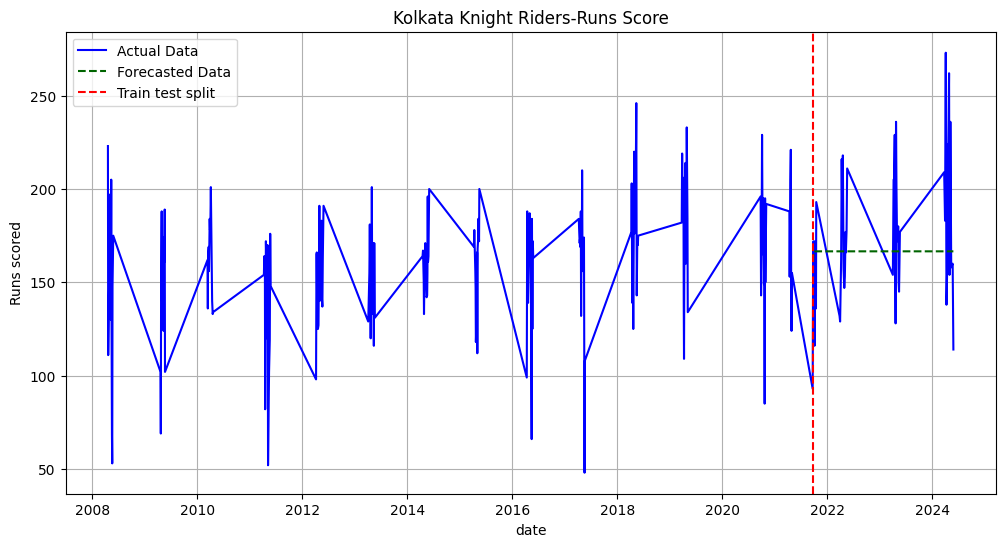

In [51]:
plt.figure(figsize=(12,6))
plt.plot(time_series_dif,label="Actual Data",color='blue')
plt.plot(forecast,label="Forecasted Data",color='darkgreen',linestyle="--")
plt.axvline(x=test.index[0],color='red',linestyle="--",label="Train test split")
plt.title(f"{team_name}-Runs Score")
plt.xlabel("date")
plt.ylabel("Runs scored")
plt.legend()
plt.grid()

In [54]:
deliveries_data=pd.read_csv('deliveries.csv')

In [56]:
deliveries_data.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [57]:
deliveries_data.batter.unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [58]:
deliveries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [60]:
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Gujarat Titans','Gujarat Lions')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Punjab Kings','Kings XI Punjab')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Pune Warriors','Rising Pune Supergiants')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
deliveries_data['batting_team']=deliveries_data['batting_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [61]:
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Rising Pune Supergiant','Rising Pune Supergiants')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Delhi Daredevils','Delhi Capitals')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Gujarat Titans','Gujarat Lions')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Punjab Kings','Kings XI Punjab')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Pune Warriors','Rising Pune Supergiants')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Royal Challengers Bengaluru','Royal Challengers Banglore')
deliveries_data['bowling_team']=deliveries_data['bowling_team'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [62]:
deliveries_data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [63]:
vkohli=deliveries_data[deliveries_data.batter=="V Kohli"]
vkohli_score=vkohli.groupby('match_id')['batsman_runs'].sum().reset_index()
vkohli_score_sub=vkohli_score.head(239)
vkohli_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [64]:
#preparing data
vkohli_score_sub["match_number"]=range(len(vkohli_score_sub))
vkohli_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


In [65]:
batter=deliveries_data.groupby(['match_id','batter']).agg({'batsman_runs':'sum'}).reset_index()
batter_scores=batter.groupby('batter')['batsman_runs'].sum().reset_index()
batter_scores=batter_scores.sort_values(by="batsman_runs",ascending=False)
top_batter_scores=batter_scores.head(10)
print(top_batter_scores)
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  print(score)



             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843
V Kohli
       match_id   batter  batsman_runs
13       335982  V Kohli             1
56       335985  V Kohli            23
168      335992  V Kohli            13
224      335996  V Kohli            12
252      335998  V Kohli             1
...         ...      ...           ...
16197   1426290  V Kohli            42
16300   1426296  V Kohli            92
16367   1426300  V Kohli            27
16434   1426306  V Kohli            47
16479   1426310  V Kohli            33

[244 rows x 3 columns]
S Dhawan
       match_id    batter  batsman_runs
35       335984  S Dhawan            52
96       335988  S Dhawan            

Text(0, 0.5, 'scores')

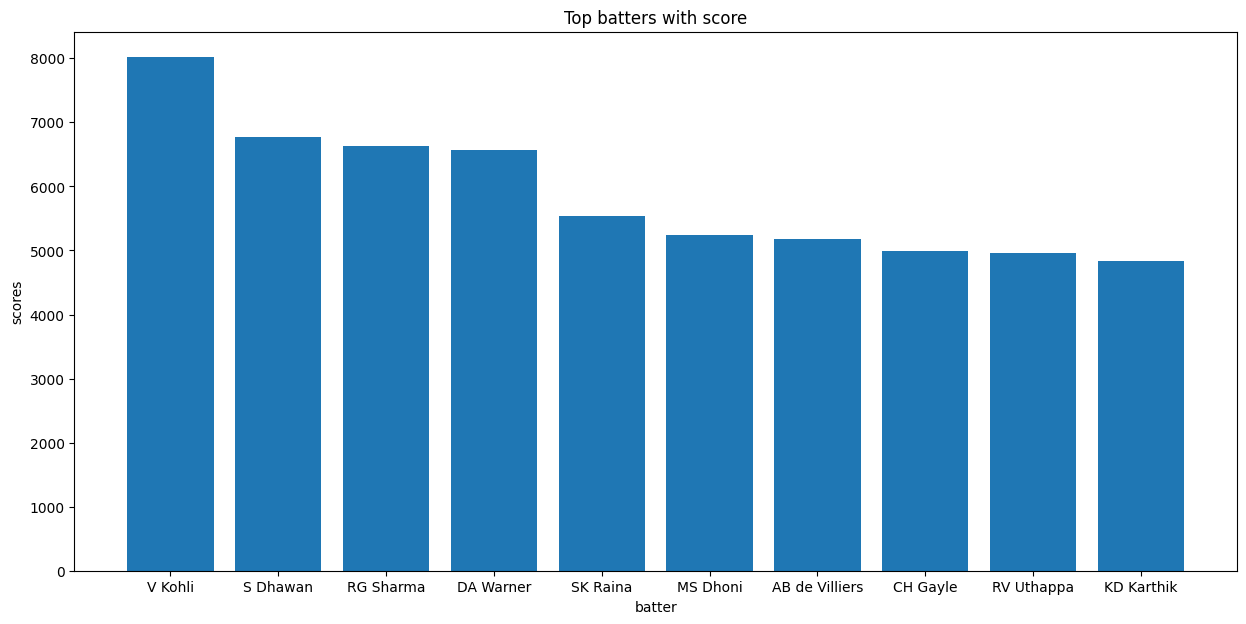

In [66]:
player=top_batter_scores['batter']
scores=top_batter_scores['batsman_runs']
fig = plt.figure(figsize = (15,7))
plt.bar(player,scores)
plt.title('Top batters with score')
plt.xlabel('batter')
plt.ylabel('scores')

for top 10 batters

In [67]:
for i in range(len(top_batter_scores)):
  batsman=top_batter_scores.iloc[i]["batter"]
  print(batsman)
  score=batter[batter['batter']==batsman]
  #preparing data
  top_batter_score=score.head(239)
  top_batter_score["match_number"]=range(len(top_batter_score))
  top_batter_score.set_index("match_number",inplace=True)
  model=ARIMA(top_batter_score["batsman_runs"],order=(1,1,1))
  model_fit=model.fit()
  forecast=model_fit.forecast(steps=5)
  print(forecast)

V Kohli
239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64
S Dhawan
221    34.077027
222    32.753423
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64
RG Sharma
239    26.263767
240    26.226524
241    26.231782
242    26.231040
243    26.231145
Name: predicted_mean, dtype: float64
DA Warner
184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64
SK Raina
200    26.396030
201    25.281171
202    25.413451
203    25.397756
204    25.399618
Name: predicted_mean, dtype: float64
MS Dhoni
228    14.177092
229    14.334177
230    14.331897
231    14.331930
232    14.331929
Name: predicted_mean, dtype: float64
AB de Villiers
170    32.171063
171    30.361837
172    30.516449
173    30.503236
174    30.504366
Name: predicted_mean, dtype: float64
CH Gayle
141    31.122217
142    29.325195
143    29.513797
144    29.494003

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for i in range(len(top_batter_scores)):
    batsman = top_batter_scores.iloc[i]["batter"]
    print(f"Batsman: {batsman}")
    score = batter[batter['batter'] == batsman]

    # Preparing data
    score["match_number"] = range(len(score))
    score.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(score) * 0.8)  # 80% train, 20% test
    train, test = score["batsman_runs"][:train_size], score["batsman_runs"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(1, 1, 1))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

    # Display results
    print("Future Forecasted Values (Next 5 Matches):")
    print(future_forecast)
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)


Batsman: V Kohli
Future Forecasted Values (Next 5 Matches):
195    24.903255
196    26.494555
197    26.615696
198    26.624918
199    26.625620
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 25.49
Mean Squared Error (MSE): 1049.98
Root Mean Squared Error (RMSE): 32.40
--------------------------------------------------
Batsman: S Dhawan
Future Forecasted Values (Next 5 Matches):
176    31.254979
177    35.307288
178    35.001749
179    35.024786
180    35.023049
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 21.69
Mean Squared Error (MSE): 701.30
Root Mean Squared Error (RMSE): 26.48
--------------------------------------------------
Batsman: RG Sharma
Future Forecasted Values (Next 5 Matches):
200    29.323259
201    26.941564
202    27.311751
203    27.254213
204    27.263156
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 18.25
Mean Squared Error (MSE): 491.34
Root Mean Squa

In [70]:
#preparing data
dhoni=deliveries_data[deliveries_data.batter=="MS Dhoni"]
dhoni_score=dhoni.groupby('match_id')['batsman_runs'].sum().reset_index()
print(dhoni_score)
dhoni_score_sub=dhoni_score.head(239)
dhoni_score_sub
dhoni_score_sub["match_number"]=range(len(dhoni_score_sub))
dhoni_score_sub.set_index("match_number",inplace=True)
model=ARIMA(vkohli_score_sub["batsman_runs"],order=(1,1,1))
model_fit=model.fit()
forecast=model_fit.forecast(steps=5)
print(forecast)

     match_id  batsman_runs
0      335983             2
1      335989            30
2      335993            43
3      335996            65
4      336001            32
..        ...           ...
223   1426284             5
224   1426287            14
225   1426291             0
226   1426297            26
227   1426306            25

[228 rows x 2 columns]
239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


Bowlers

In [72]:
bowler_data = deliveries_data[['match_id', 'bowler', 'is_wicket', 'total_runs']]
performance = bowler_data.groupby(['match_id', 'bowler']).agg(
    wickets=('is_wicket', 'sum'),
    runs_conceded=('total_runs', 'sum')
).reset_index()

print(performance)

top_bowler = 'YS Chahal'
bowler_timeseries = performance[performance['bowler'] == top_bowler].set_index('match_id')['wickets']
print(bowler_timeseries)

bowler_timeseries = bowler_timeseries.sort_index()

       match_id         bowler  wickets  runs_conceded
0        335982      AA Noffke        1             41
1        335982     AB Agarkar        3             25
2        335982       AB Dinda        2              9
3        335982       CL White        0             24
4        335982       I Sharma        1             13
...         ...            ...      ...            ...
12973   1426312     PJ Cummins        1             18
12974   1426312      SP Narine        1             20
12975   1426312  Shahbaz Ahmed        1             28
12976   1426312    T Natarajan        0             29
12977   1426312       VG Arora        1             26

[12978 rows x 4 columns]
match_id
598029     0
729281     1
729287     2
729299     1
729305     1
          ..
1426294    1
1426299    1
1426303    2
1426310    1
1426311    0
Name: wickets, Length: 159, dtype: int64


In [73]:
model = ARIMA(bowler_timeseries, order=(2, 1, 2))
model_fit = model.fit()

forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


In [74]:
print(forecast)

159    1.005454
160    1.437802
161    1.202628
162    1.464834
163    1.206342
164    1.465336
165    1.206418
166    1.465339
167    1.206425
168    1.465333
Name: predicted_mean, dtype: float64


In [75]:
bowlers=performance.groupby('bowler')['wickets'].sum().reset_index()
top_bowl=bowlers.sort_values(by="wickets",ascending=False)
top_bowlers=top_bowl.head(10)
top_bowlers

,bowler,wickets
524,YS Chahal,213
119,DJ Bravo,207
348,PP Chawla,201
446,SP Narine,200
355,R Ashwin,198
71,B Kumar,195
438,SL Malinga,188
8,A Mishra,183
193,JJ Bumrah,182
373,RA Jadeja,169


In [76]:
for i in range(len(top_bowlers)):
  bowler=top_bowlers.iloc[i]["bowler"]
  print(bowler)
  bscore=performance[performance['bowler']==bowler]
  print(bscore)

YS Chahal
       match_id     bowler  wickets  runs_conceded
4236     598029  YS Chahal        0             35
4782     729281  YS Chahal        1             18
4816     729287  YS Chahal        2             17
4889     729299  YS Chahal        1             26
4923     729305  YS Chahal        1             17
...         ...        ...      ...            ...
12793   1426294  YS Chahal        1             48
12851   1426299  YS Chahal        1             22
12890   1426303  YS Chahal        2             31
12952   1426310  YS Chahal        1             43
12965   1426311  YS Chahal        0             34

[159 rows x 4 columns]
DJ Bravo
       match_id    bowler  wickets  runs_conceded
84       335989  DJ Bravo        0             37
110      335991  DJ Bravo        0             27
146      335994  DJ Bravo        0             31
182      335997  DJ Bravo        1             25
267      336004  DJ Bravo        1             29
...         ...       ...      ...           

For top 10 bowlers

In [77]:

# Loop through top bowlers to predict and evaluate
for i in range(len(top_bowlers)):
    bowler = top_bowlers.iloc[i]["bowler"]
    print(f"Bowler: {bowler}")

    # Filter performance data for the bowler
    bscore = performance[performance['bowler'] == bowler]

    # Preparing data
    bscore["match_number"] = range(len(bscore))
    bscore.set_index("match_number", inplace=True)

    # Splitting into train and test sets
    train_size = int(len(bscore) * 0.8)  # 80% train, 20% test
    train, test = bscore["wickets"][:train_size], bscore["wickets"][train_size:]

    # Fitting the ARIMA model
    model = ARIMA(train, order=(2, 1, 2))
    model_fit = model.fit()

    # Forecasting for test set
    test_forecast = model_fit.forecast(steps=len(test))

    # Forecasting beyond the dataset
    future_forecast = model_fit.forecast(steps=5)

    # Evaluation metrics
    mae = mean_absolute_error(test, test_forecast)
    mse = mean_squared_error(test, test_forecast)
    rmse = np.sqrt(mse)

    # results
    print("Future Forecasted Values (Next 5 Matches):")
    print(future_forecast)
    print("Evaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("-" * 50)


Bowler: YS Chahal
Future Forecasted Values (Next 5 Matches):
127    1.610157
128    1.622462
129    1.622438
130    1.622196
131    1.622358
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 1.09
Mean Squared Error (MSE): 1.62
Root Mean Squared Error (RMSE): 1.27
--------------------------------------------------
Bowler: DJ Bravo
Future Forecasted Values (Next 5 Matches):
126    0.835113
127    1.136975
128    1.219572
129    1.257388
130    1.263167
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 0.86
Mean Squared Error (MSE): 1.15
Root Mean Squared Error (RMSE): 1.07
--------------------------------------------------
Bowler: PP Chawla
Future Forecasted Values (Next 5 Matches):
152    1.015388
153    1.103004
154    0.903367
155    1.110538
156    0.906764
Name: predicted_mean, dtype: float64
Evaluation Metrics:
Mean Absolute Error (MAE): 0.77
Mean Squared Error (MSE): 0.95
Root Mean Squared Error (RMSE): 0.98
-----

Text(0, 0.5, 'wickets')

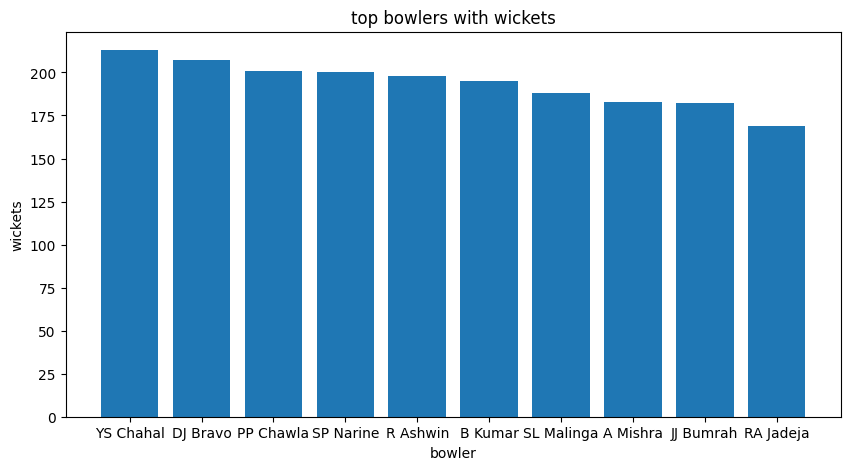

In [78]:
bowler=top_bowlers['bowler']
scores=top_bowlers['wickets']
fig = plt.figure(figsize = (10, 5))
plt.bar(bowler,scores)
plt.title('top bowlers with wickets')
plt.xlabel('bowler')
plt.ylabel('wickets')